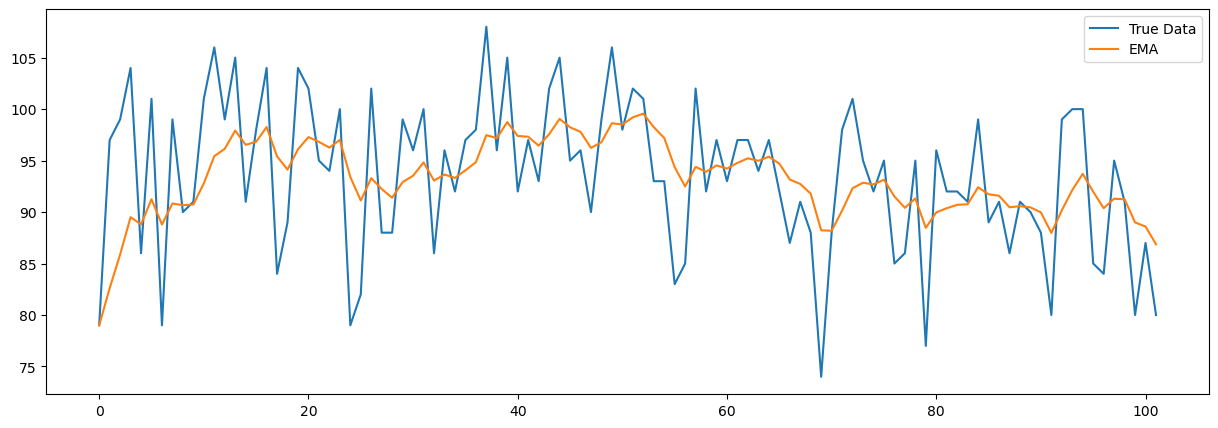

In [36]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


data_folder = os.path.join(os.path.dirname(os.getcwd())+'/data/')

#Read in google Data
dc_blossoms = pd.read_csv(os.path.join(data_folder, 'dc_blossoms.csv'))
dc_blossoms_year = dc_blossoms[['year']]
dc_blossoms_date = dc_blossoms[['date']]

plt.figure(figsize=(15, 5))
plt.plot(np.arange(102), dc_blossoms_date, label = 'True Data')

# Convert the data to a pandas Series
series = dc_blossoms_date.squeeze()

# Calculate the exponential moving average
alpha = 0.2  # Smoothing factor
ema = series.ewm(alpha=alpha, adjust=False).mean()

plt.plot(ema, label = 'EMA')
plt.legend()
plt.show()


In [39]:
#Split data into training (up to 2000)
train_dates = dc_blossoms_date.head(70)
train_years = dc_blossoms_year.head(70)

# Define the window size for training data (10 years)
window_size = 10

train_test_pairs = []

# Iterate over the data to create train-test pairs
for i in range(len(train_dates) - window_size):
    train_data = train_dates.iloc[i:i + window_size]
    test_data = train_dates.iloc[i + window_size]
    train_test_pairs.append((train_data, test_data))

# Apply EMA to each train-test pair
alpha = 0.2  # Smoothing factor
ema_preds = []
prev_year_preds = []
ema_mae_list = []  # List to store MSE for each prediction
for pair in train_test_pairs:
    train_data, test_data = pair

    # Make Predictions
    prev_year_prediction = train_data.tail(1)
    ema_test_prediction = train_data.ewm(alpha=alpha, adjust=False).mean().iloc[-1]
    
    # 
    ema_preds.append((ema_test_prediction))
    ema_mae = mean_absolute_error([test_data], [ema_test_prediction])
    ema_mae_list.append(ema_mae)

ema_avg_mae = np.mean(ema_mae_list)